In [2]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib
import math
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import scipy.stats as sts

In [51]:
def data_make(model, sigma):
    x = np.linspace(0, 2*3.1415, 100)
    y = []
    for i in range(len(x)):
        x[i] = sts.norm(x[i],2*3.1415/100).rvs(1)
    for i in range(len(x)):
        y.append(sts.norm(model(x[i]), sigma).rvs(1))
    return x, y

In [391]:
def model(x):
    return 3*np.cos(x)+1.5*np.sin(x+0.5)+2
def model_1(x):
    return 3*np.cos(x+1.5)+2+2*np.sin(2*x+0.3)

In [392]:
def data_generate(model, model_1, sigma, N):
    X_1 = []
    Y_1 = []
    X_2 = []
    Y_2 = []
    for _ in range(N):
        x, y = data_make(model, sigma)
        X_1.append(x)
        Y_1.append(y)
        x, y = data_make(model_1, sigma)
        X_2.append(x)
        Y_2.append(y)
    return X_1, Y_1, X_2, Y_2

In [393]:
X_1, Y_1, X_2, Y_2 =  data_generate(model, model_1, 0.2, 100)

In [394]:
def get_koef(phi, h, X, Y):
    sigma = 0
    mu = 0
    n = 0
    mu = Y[abs(X-phi)<h].mean()
    sigma = Y[abs(X-phi)<h].std()
    return mu, sigma

In [395]:
def learning_proces(X_1, Y_1, X_2, Y_2, h):
    phis = np.linspace(0, 2*3.1415, math.floor(3.1415/h))
    mu_1 = np.zeros(len(phis))
    sigma_1 = np.zeros(len(phis))
    mu_2 = np.zeros(len(phis))
    sigma_2 = np.zeros(len(phis))
    for i in range(len(phis)):
        mu_1[i] , sigma_1[i] = get_koef(phis[i], h, X_1, Y_1)
        mu_2[i], sigma_2[i] = get_koef(phis[i], h, X_2, Y_2)
    return phis, mu_1, mu_2, sigma_1, sigma_2

In [396]:
def count_metrics(mu_1, sigma_1,mu_2, sigma_2, Y):
    r = 0
    for y in Y:
        r -= float((y[0]-mu_1)**2/2/sigma_1**2)
        r -= float((y[1]-mu_2)**2/2/sigma_2**2)
    return float(r)

In [397]:
def make_prediction(Y, phis, mu_1, mu_2, sigma_1, sigma_2):
    ans = 0
    prob = count_metrics(mu_1[0], sigma_1[0],mu_2[0], sigma_2[0], Y)
    for i in range( len(mu_1)):
        a = count_metrics(mu_1[i], sigma_1[i],mu_2[i], sigma_2[i], Y)
        if a > prob:
            ans = phis[i]
            prob = a
    probability = np.zeros(len(phis))
    for i in range(len(phis)):
        probability[i] = count_metrics(mu_1[i], sigma_1[i],mu_2[i], sigma_2[i], Y)
    return ans, prob/len(Y), probability

In [398]:
%%time
phis, mu_1, mu_2, sigma_1, sigma_2 = learning_proces(np.array(X_1), np.array(Y_1), np.array(X_2), np.array(Y_2), 0.02)

CPU times: user 72 ms, sys: 3.61 ms, total: 75.6 ms
Wall time: 74 ms


In [399]:
def make_test(n, x, model, sigma, model_1):
    return [[float(sts.norm(model(x), sigma).rvs(1)),float(sts.norm(model_1(x), sigma).rvs(1))]  for i in range(10)]


ans, proba, probability = make_prediction(make_train(10, 4, model, 0.2, model_1), phis, mu_1, mu_2, sigma_1, sigma_2)

In [400]:
np.exp(proba)

0.43809084881291216

In [401]:
ans

3.9872884615384616

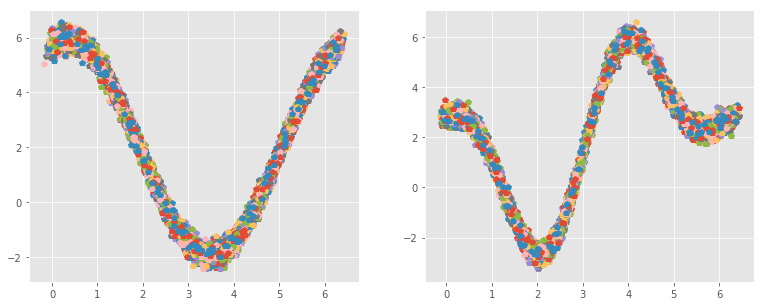

In [402]:
f,axs = plt.subplots(1,2, figsize=(13,5))
for i in range(len(X_1)):
    axs[0].plot(X_1[i], Y_1[i], 'p')
for i in range(len(X_2)):
    axs[1].plot(X_2[i], Y_2[i], 'p')

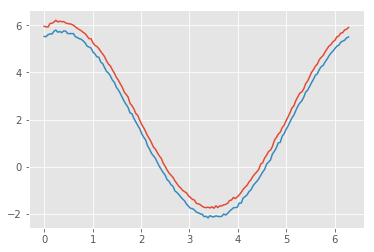

In [403]:
plt.plot(phis, np.array(mu_1)+np.array(sigma_1))
plt.plot(phis, np.array(mu_1)-np.array(sigma_1))

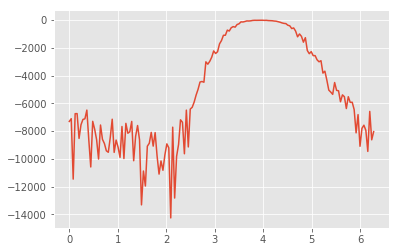

In [404]:
plt.plot(phis, probability)

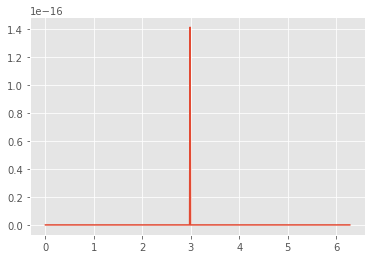

In [377]:
plt.plot(phis, np.exp(probability))


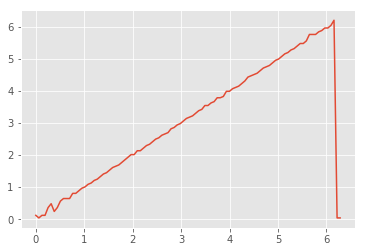

In [405]:
phi_test = np.linspace(0, 2*3.1415, 100)
answers = np.zeros(len(phi_test))
for i in range(len(phi_test)):
    answers[i], proba, probability = make_prediction(make_train(10, phi_test[i], model, 0.2, model_1), phis, mu_1, mu_2, sigma_1, sigma_2)
plt.plot(phi_test, answers)  

In [8]:
a = [np.array([5,6,7,8]), np.array([7,9,8]), np.array([20,14,15])]

In [13]:
a[0].sum()

26